<a href="https://colab.research.google.com/github/rb125/opencv-stuff/blob/master/cnn_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass


In [2]:
SEED_VALUE = 42
# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


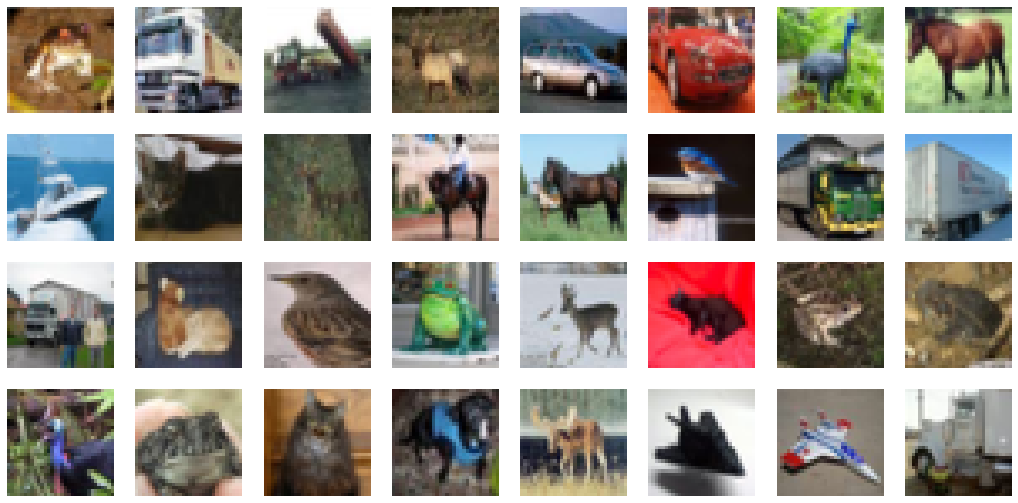

In [3]:
plt.figure(figsize=(18, 9))
 
num_rows = 4
num_cols = 8
 
# plot each of the images in the batch and the associated ground truth labels.
for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i,:,:])
    plt.axis("off")


In [4]:
# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255
 
# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])
 
# Convert labels to one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
 
print('After conversion to categorical one-hot encoded labels: ', y_train[0])


Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [5]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 10
    IMG_HEIGHT:   int = 32
    IMG_WIDTH:    int = 32
    NUM_CHANNELS: int = 3
     
@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 31
    BATCH_SIZE:    int = 256
    LEARNING_RATE: float = 0.001

**Define the model**

In [6]:
def cnn_model(input_shape=(32,32,3)):
  model = Sequential()

  #------------------------------------
  # Conv Block 1: 32 Filters, MaxPool.
  #------------------------------------
  model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
  model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  #------------------------------------
  # Conv Block 2: 64 Filters, MaxPool.
  #------------------------------------
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
 
  #------------------------------------
  # Conv Block 3: 64 Filters, MaxPool.
  #------------------------------------
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
     
  #------------------------------------
  # Flatten the convolutional features.
  #------------------------------------
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model

**Create the model**

In [7]:
model = cnn_model()
# Create the model.
model = cnn_model()
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

**Compile the model**

In [8]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'],
             )

**Train the model**

In [9]:
history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE, 
                    epochs=TrainingConfig.EPOCHS, 
                    verbose=1, 
                    validation_split=.3,
                   )

Epoch 1/31
137/137 [==============================] - 284s 2s/step - loss: 2.1479 - accuracy: 0.2188 - val_loss: 2.0337 - val_accuracy: 0.2348
Epoch 2/31
137/137 [==============================] - 278s 2s/step - loss: 1.7298 - accuracy: 0.3761 - val_loss: 1.6105 - val_accuracy: 0.4137
Epoch 3/31
137/137 [==============================] - 278s 2s/step - loss: 1.4830 - accuracy: 0.4669 - val_loss: 1.3822 - val_accuracy: 0.4884
Epoch 4/31
137/137 [==============================] - 285s 2s/step - loss: 1.3227 - accuracy: 0.5282 - val_loss: 1.4686 - val_accuracy: 0.4850
Epoch 5/31
137/137 [==============================] - 290s 2s/step - loss: 1.1877 - accuracy: 0.5796 - val_loss: 1.2487 - val_accuracy: 0.5721
Epoch 6/31
137/137 [==============================] - 280s 2s/step - loss: 1.0507 - accuracy: 0.6271 - val_loss: 1.0194 - val_accuracy: 0.6391
Epoch 7/31
137/137 [==============================] - 264s 2s/step - loss: 0.9330 - accuracy: 0.6709 - val_loss: 1.0409 - val_accuracy: 0.6398

**Plot the training results (loss, accuracy)**

In [10]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
     
    fig, ax = plt.subplots(figsize=(15, 4))
 
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
         
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
     
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()
    

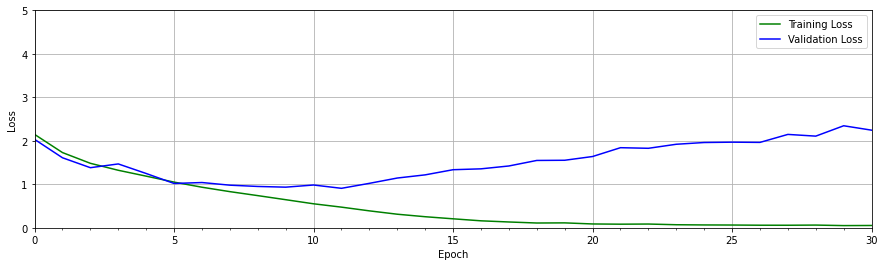

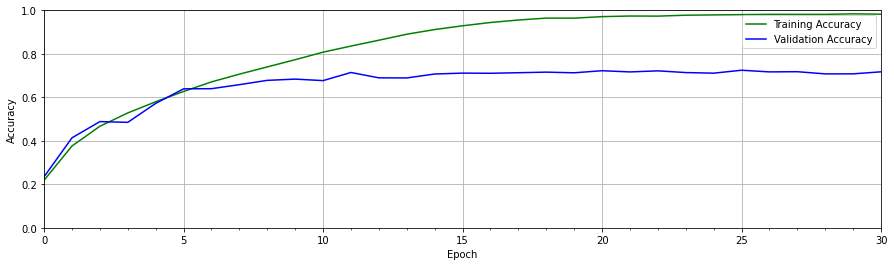

In [11]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]
   
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])


**Define the model with dropout**

In [12]:
def cnn_model_dropout(input_shape=(32, 32, 3)):
     
    model = Sequential()
     
    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
     
    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
     
    return model
    

**Create the dropout model**

In [13]:
# Create the model.
model_dropout = cnn_model_dropout()
model_dropout.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

**Compile the dropout model**

In [14]:
model_dropout.compile(optimizer='rmsprop', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'],
                     )


**Train the dropout model**

In [ ]:
history_dropout = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE, 
                    epochs=TrainingConfig.EPOCHS, 
                    verbose=1, 
                    validation_split=.3,
                   )

Epoch 1/31
137/137 [==============================] - 286s 2s/step - loss: 0.0507 - accuracy: 0.9827 - val_loss: 2.0922 - val_accuracy: 0.7210
Epoch 2/31
137/137 [==============================] - 281s 2s/step - loss: 0.0502 - accuracy: 0.9850 - val_loss: 2.2660 - val_accuracy: 0.7134
Epoch 3/31
137/137 [==============================] - 310s 2s/step - loss: 0.0493 - accuracy: 0.9846 - val_loss: 2.4467 - val_accuracy: 0.7035
Epoch 4/31
137/137 [==============================] - 266s 2s/step - loss: 0.0430 - accuracy: 0.9863 - val_loss: 2.4979 - val_accuracy: 0.7154
Epoch 5/31
 72/137 [==============>...............] - ETA: 1:54 - loss: 0.0469 - accuracy: 0.9858

**Plot the training results**

In [ ]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]
     
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

**Save the model**

In [ ]:
model_dropout.save('model-dropout')


**Load the model**


In [ ]:
from tensorflow.keras import models
reload_model = models.load_model('model-dropout')